<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import seaborn as sns

In [6]:
def bernoulli(p):
  return 1 if np.random.uniform() <=p else 0

def exponencial(lmda=1):
  u = np.random.uniform()
  return float(-np.log(u)/lmda)
c = np.sqrt((2*np.e)/np.pi)
def h_normal():
  u= np.random.uniform()
  y = exponencial(1)
  while u > (2/np.sqrt(2*np.pi))*np.e**((-y**2)/2)/ c*np.e**y:
    y = exponencial(1)
    u = np.random.uniform()
  return y

def normal_padrao():
  return h_normal() if bernoulli(1/2) else -h_normal()

def normal(mu=0, sig2=1):
  return normal_padrao()*np.sqrt(sig2) + mu


# Exercício 1

Ache **intervalos de confiança** para os exemplos do laboratório anterior.

O objetivo é estimar uma quantidade de interesse

$$
I = \mathbb{E}[h(X)],
$$

usando o estimador de Monte Carlo

$$
\hat{I}_n = \frac{1}{n}\sum_{i=1}^n h(X_i),
$$

onde $X_1, \ldots, X_n$ são amostras independentes de $X$.

Pelo Teorema Central do Limite, para $n$ grande,

$$
\hat{I}_n \approx \mathcal{N}\left(I, \frac{\sigma^2}{n}\right),
$$

onde $\sigma^2 = \mathrm{Var}(h(X))$. Como $\sigma^2$ é desconhecido, usamos o desvio padrão amostral

$$
s_n^2 = \frac{1}{n-1}\sum_{i=1}^n (h(X_i) - \hat{I}_n)^2.
$$

Um intervalo de confiança de 95% para $I$ é dado por

$$
\hat{I}_n \pm 1.96\,\frac{s_n}{\sqrt{n}}.
$$


In [7]:
# função para o desvio padrao: np.std()
# não foram feito ICs para o exemplo 12
tamanho = 10000

def media_MC(func, *densidades, range_=10000):
  amostra = [func(*densidades) for _ in range(range_)]
  return amostra, float(sum(amostra)) / range_

def funcao_16(densidade):
  x = densidade()
  return np.sin(x)/(x*np.exp(-x))

contador = 1
for function,*densities in [
    (lambda x: np.exp(-float(x())**2), np.random.uniform),
    (lambda x: 1 if x() > 1 else 0, normal),
    (lambda x,y: 4 if (x()**2+y()**2) < 1 else 0, np.random.uniform, np.random.uniform),
    (lambda x,y: np.exp(-(x()**2 + y()**2)), np.random.uniform,np.random.uniform),
    (lambda x: np.exp(-x()), exponencial),
    (lambda x: 1/(1+x()), exponencial),
    (funcao_16, exponencial)
  ]:
  amostra, estimativa = media_MC(function, *densities, range_=tamanho)
  s_estimativa = np.std(amostra)/np.sqrt(tamanho) #(sum([i**2 for i in amostra])/ (tamanho - 1) - estimativa**2)**(1/2)
  print(f'Intervalo de confiança para a variável {contador}: ', f'({estimativa - (1.96*s_estimativa)} ; {estimativa + (1.96*s_estimativa)})' )
  contador +=1





Intervalo de confiança para a variável 1:  (0.7421964901563982 ; 0.7500746681238153)
Intervalo de confiança para a variável 2:  (0.1463366962467695 ; 0.1604633037532305)
Intervalo de confiança para a variável 3:  (3.118333897783884 ; 3.182466102216116)
Intervalo de confiança para a variável 4:  (0.5541531413473353 ; 0.5626477478535976)
Intervalo de confiança para a variável 5:  (0.49274533141955 ; 0.5040310721601532)
Intervalo de confiança para a variável 6:  (0.5931152648575713 ; 0.6016702664292659)
Intervalo de confiança para a variável 7:  (-1.8192832372769914 ; 2.206263115614777)


# Exercício 2

Sejam $X_1, \ldots, X_n$ variáveis independentes $X_i \sim \mathcal{N}(0, \sigma^2)$.  
O objetivo é verificar, por meio de simulações de Monte Carlo, o comportamento de  
$\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ em relação ao limite teórico $\sqrt{2\sigma^2 \log(n)}$.

- Para $n = 1, 2, \ldots, 1000$, estime $\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ com amostras de tamanho $M = 1000$.

- Plote, em um único gráfico:
  - A curva estimada de $\mathbb{E}\left[\max_{1 \leq i \leq n} X_i\right]$ para $n = 1, 2, \ldots, 1000$;
  - A curva teórica $\sqrt{2\sigma^2 \log(n)}$, para comparação.


[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569, 573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621, 625, 629, 633, 637, 641, 645, 649, 653, 657, 661, 665, 669, 673, 677, 681, 685, 689, 693, 697, 701, 705, 709, 713, 717, 721, 725, 729, 733, 737, 741, 745, 749, 753, 757, 761, 765, 769, 773, 777, 781, 785, 789, 793, 797, 801, 805, 809, 813, 817, 82

<Axes: >

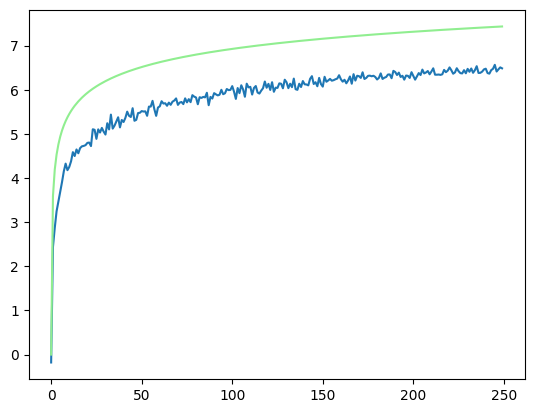

In [8]:
sigma2 = 4
tamanhos = [i+1 for i in range(0,1000,4)]


def a(n,sigma2):
  maximos = []
  for _ in range(100):
    maximo = normal(0,4)
    for _ in range (n-1):
      x = normal(0,sigma2)
      if x > maximo:
        maximo = x
    maximos.append(maximo)
  return sum(maximos)/100

valores = [a(n,sigma2) for n in tamanhos]
teorico = [np.sqrt(2*sigma2*np.log(n)) for n in tamanhos]

sns.lineplot(valores)
sns.lineplot(teorico, color='lightgreen')
